In [34]:
import pandas as pd
import matplotlib.pyplot as plt

csv_path = "../csv_output/output_video_marvel_opt30_25.csv"

df = pd.read_csv(csv_path)


In [20]:
df['Dominant'] = df[['Prob_ShotType_CLOSE_UP', 'Prob_ShotType_MEDIUM', 'Prob_ShotType_WIDE']].idxmax(axis=1)

dominant_counts = df['Dominant'].value_counts()

total_frames = dominant_counts.sum()

ratios_all = {
    'CLOSE_UP': 100 * dominant_counts.get('Prob_ShotType_CLOSE_UP', 0) / total_frames,
    'MEDIUM':   100 * dominant_counts.get('Prob_ShotType_MEDIUM', 0) / total_frames,
    'WIDE':     100 * dominant_counts.get('Prob_ShotType_WIDE', 0) / total_frames
}

print("| Shot Type | Percentage |")
print("|-----------|------------|")
for shot_type, ratio in ratios_all.items():
    print(f"| {shot_type:<9} | {ratio:>9.2f}% |")

| Shot Type | Percentage |
|-----------|------------|
| CLOSE_UP  |      8.17% |
| MEDIUM    |     30.81% |
| WIDE      |     61.02% |


In [24]:
# Výpočet dominantního typu záběru v zadaném časovém intervalu
start_time = 0       # nastav začátek (v ms)
end_time = 30000     # nastav konec (v ms)

df_range = df[(df['Timestamp'] >= start_time) & (df['Timestamp'] <= end_time)]

df_range['Dominant'] = df_range[['Prob_ShotType_CLOSE_UP', 'Prob_ShotType_MEDIUM', 'Prob_ShotType_WIDE']].idxmax(axis=1)

dominant_counts = df_range['Dominant'].value_counts()

total_frames = dominant_counts.sum()

ratios_all = {
    'CLOSE_UP': 100 * dominant_counts.get('Prob_ShotType_CLOSE_UP', 0) / total_frames,
    'MEDIUM':   100 * dominant_counts.get('Prob_ShotType_MEDIUM', 0) / total_frames,
    'WIDE':     100 * dominant_counts.get('Prob_ShotType_WIDE', 0) / total_frames
}

print(f"Dominant shot type statistics from {start_time}ms to {end_time}ms:")
print("| Shot Type | Percentage |")
print("|-----------|------------|")
for shot_type, ratio in ratios_all.items():
    print(f"| {shot_type:<9} | {ratio:>9.2f}% |")

Dominant shot type statistics from 0ms to 30000ms:
| Shot Type | Percentage |
|-----------|------------|
| CLOSE_UP  |     12.92% |
| MEDIUM    |     12.77% |
| WIDE      |     74.32% |


/var/folders/ks/ht8v7lfj77z24h17jq50ybd00000gn/T/ipykernel_59737/27595793.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_range['Dominant'] = df_range[['Prob_ShotType_CLOSE_UP', 'Prob_ShotType_MEDIUM', 'Prob_ShotType_WIDE']].idxmax(axis=1)


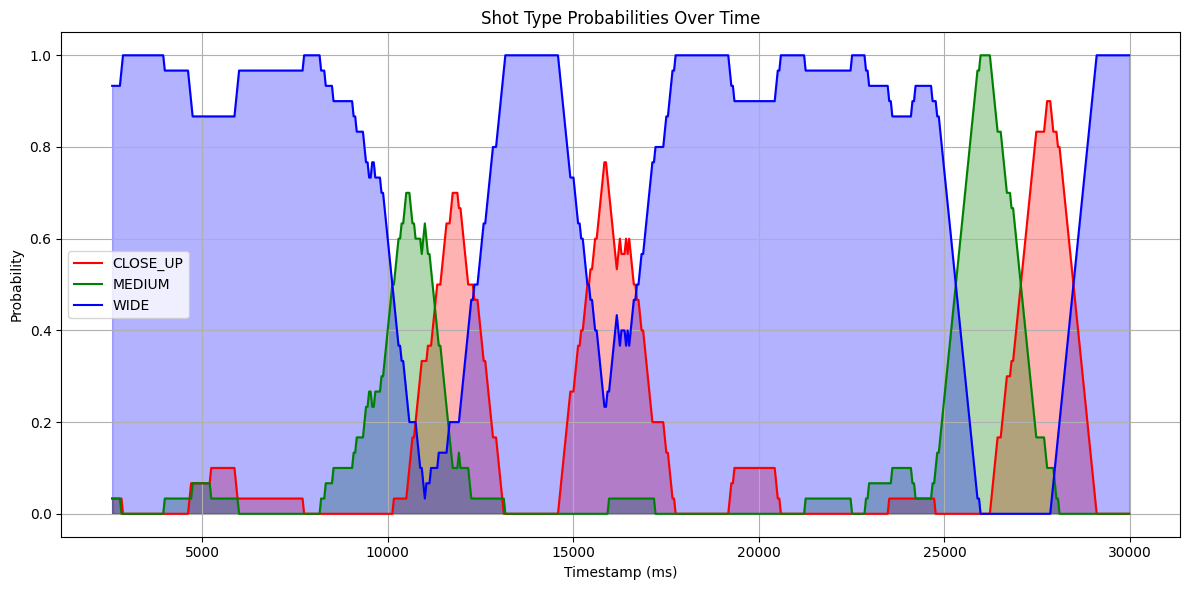

In [35]:


start_time = 0
end_time = 30000

columns = ['Timestamp', 'Prob_ShotType_CLOSE_UP', 'Prob_ShotType_MEDIUM', 'Prob_ShotType_WIDE']
df_selected = df[(df['Timestamp'] >= start_time) & (df['Timestamp'] <= end_time)][columns].dropna()


plt.figure(figsize=(12, 6))

plt.fill_between(df_selected['Timestamp'], df_selected['Prob_ShotType_CLOSE_UP'], color='red', alpha=0.3)
plt.fill_between(df_selected['Timestamp'], df_selected['Prob_ShotType_MEDIUM'], color='green', alpha=0.3)
plt.fill_between(df_selected['Timestamp'], df_selected['Prob_ShotType_WIDE'], color='blue', alpha=0.3)

plt.plot(df_selected['Timestamp'], df_selected['Prob_ShotType_CLOSE_UP'], label='CLOSE_UP', color='red')
plt.plot(df_selected['Timestamp'], df_selected['Prob_ShotType_MEDIUM'], label='MEDIUM', color='green')
plt.plot(df_selected['Timestamp'], df_selected['Prob_ShotType_WIDE'], label='WIDE', color='blue')

plt.xlabel("Timestamp (ms)")
plt.ylabel("Probability")
plt.title("Shot Type Probabilities Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

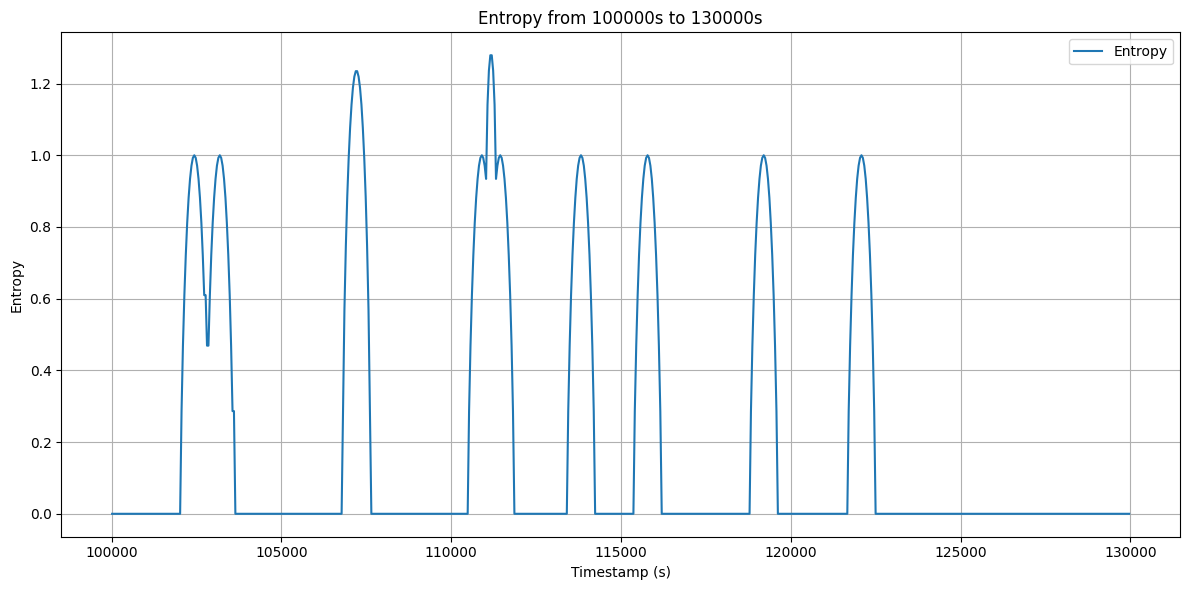

In [40]:

subset = df[(df['Timestamp'] >= start_time) & (df['Timestamp'] <= end_time)]

plt.figure(figsize=(12, 6))
plt.plot(subset['Timestamp'], subset['Entropy'], label='Entropy')
plt.xlabel('Timestamp (s)')
plt.ylabel('Entropy')
plt.title(f'Entropy from {start_time}s to {end_time}s')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

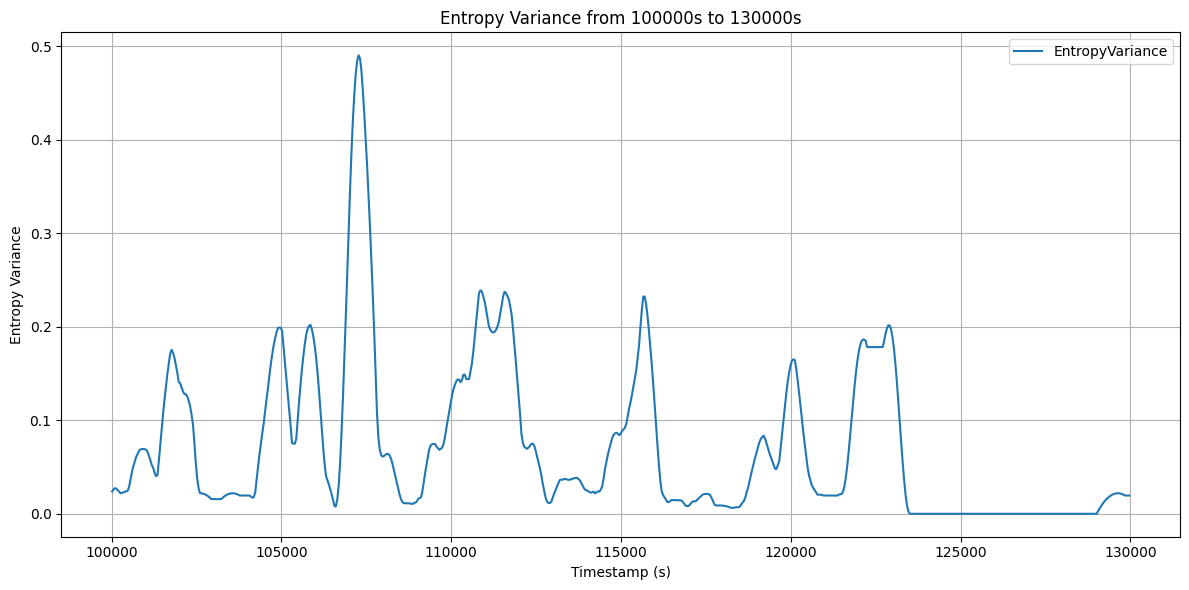

In [37]:

subset = df[(df['Timestamp'] >= start_time) & (df['Timestamp'] <= end_time)]

plt.figure(figsize=(12, 6))
plt.plot(subset['Timestamp'], subset['EntropyVariance'], label='EntropyVariance')
plt.xlabel('Timestamp (s)')
plt.ylabel('Entropy Variance')
plt.title(f'Entropy Variance from {start_time}s to {end_time}s')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

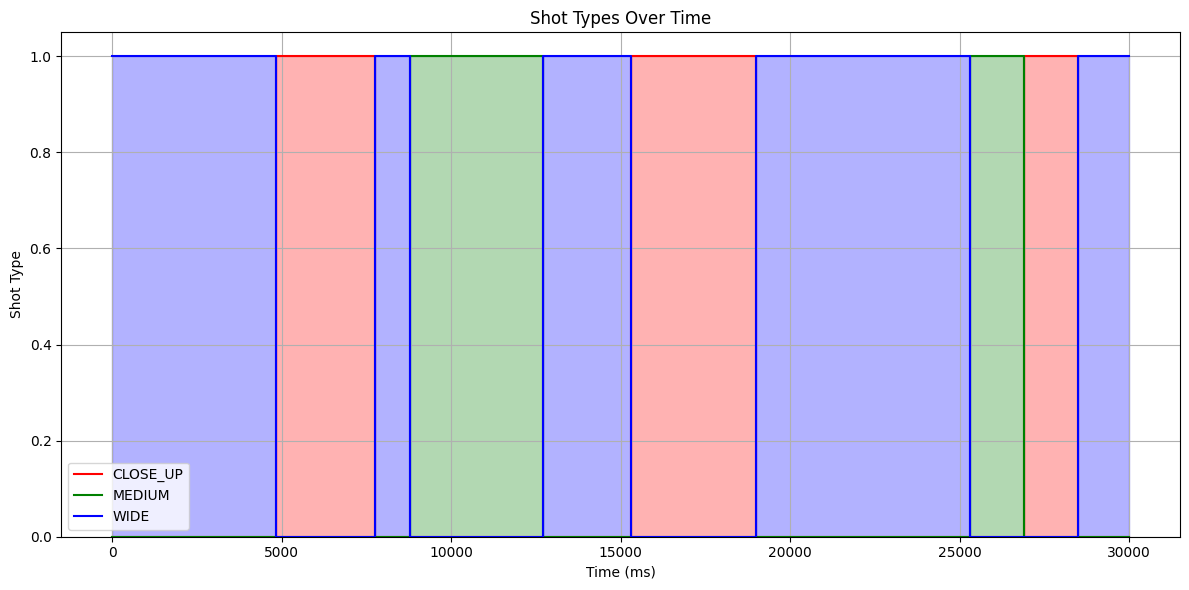

{'Time (ms)': [0, 4840, 7760, 8800, 10000, 12700, 15300, 17000, 19000, 25300, 26900, 28500, 30000], 'Shot': ['WIDE', 'CLOSE', 'WIDE', 'MEDIUM', 'MEDIUM', 'WIDE', 'CLOSE', 'CLOSE', 'WIDE', 'MEDUIM', 'CLOSE', 'WIDE', 'WIDE']}


In [26]:
data = {
    "Time (ms)": [0, 4840, 7760, 8800, 10000, 12700, 15300, 17000, 19000, 25300, 26900, 28500, 30000],
    "Shot": ["WIDE", "CLOSE", "WIDE", "MEDIUM", "MEDIUM", "WIDE", "CLOSE", "CLOSE", "WIDE", "MEDUIM", "CLOSE", "WIDE", "WIDE"]
}

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_shots = pd.DataFrame(data)
df_shots["Shot"] = df_shots["Shot"].replace("MEDUIM", "MEDIUM")


df_encoded = pd.get_dummies(df_shots["Shot"])
df_encoded["Time (ms)"] = df_shots["Time (ms)"]
df_encoded = df_encoded[["Time (ms)", "CLOSE", "MEDIUM", "WIDE"]]
df_encoded = df_encoded.rename(columns={"CLOSE": "CLOSE_UP"})

def plot_step_fill(x, y, label, color):
    x_step = np.repeat(x, 2)[1:]
    y_step = np.repeat(y, 2)[:-1]
    plt.plot(x_step, y_step, label=label, color=color)
    plt.fill_between(x_step, y_step, step='pre', alpha=0.3, color=color)


x = df_encoded["Time (ms)"].values
plt.figure(figsize=(12, 6))

plot_step_fill(x, df_encoded["CLOSE_UP"].values, "CLOSE_UP", "red")
plot_step_fill(x, df_encoded["MEDIUM"].values, "MEDIUM", "green")
plot_step_fill(x, df_encoded["WIDE"].values, "WIDE", "blue")

plt.xlabel("Time (ms)")
plt.ylabel("Shot Type")
plt.ylim(0, 1.05)
plt.title("Shot Types Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(data)

